# Processing Complex Data

So far we have assumed that the intput is in the form of numerical vectors to which we can apply directly the algorithms we have. Often the data will be more complex. For example what if we want to cluster categorical data, itemsets, or text? Python provides libraries for processing the data and transforming them to a format that we can use.

Python offers a set of tools for extracting features:http://scikit-learn.org/stable/modules/feature_extraction.html

In [ ]:
import numpy as np
import scipy as sp
import scipy.sparse as sp_sparse
import scipy.spatial.distance as sp_dist

import matplotlib.pyplot as plt

import sklearn as sk
import sklearn.datasets as sk_data
import sklearn.metrics as metrics
from sklearn import preprocessing
import sklearn.cluster as sk_cluster
import sklearn.feature_extraction.text as sk_text


import scipy.cluster.hierarchy as hr

import time
import seaborn as sns

%matplotlib inline

We will now see some Encoders, which are libraries that take some data records and produce numerical vectors that represent them. All of these libraries have two methods:

**fit**: "learns" the encoding from the input data

**transform**: takes a set of data in the original representation and produces the new numerical representation

**get_feature_names_out**: Gives us the names of the new attributes that are created

### Ordinal Encoder

The Ordinal encoder enables us to encode categorical attributes as numerical by assigning an increasing numerical value to each attribute value.

You can read more here:

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html#sklearn.preprocessing.OrdinalEncoder

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

X = [['married','Yes','Athens'],
     ['single','No', 'Ioannina'],
     ['married','No', 'Thessaloniki'],
     ['divorced', 'Yes', 'Athens']]
enc = OrdinalEncoder(handle_unknown = 'use_encoded_value', unknown_value = np.nan)
enc.fit(X)
print(enc.categories_)
print(enc.transform(X))

We can now apply to new data. New values that are not previously endcoded will be represented with NaN

In [ ]:
Y = [['married','No','Athens'],
     ['single','Yes', 'Ioannina'],
     ['single','Yes', 'Patras']
    ]
enc.transform(Y)

Numeric values are also encoded with increasing numbers

In [ ]:
X = [['married','Yes',30000],
     ['single','No', 24000],
     ['divorced', 'Yes', 50000]]
enc = OrdinalEncoder(handle_unknown = 'use_encoded_value',unknown_value = -1)
enc.fit(X)
print(enc.categories_)
print("\n")
print(enc.transform(X))
Y = [['married','No',10000],
     ['single','Yes', 24000]]
print("\n")
print(enc.transform(Y))

### DictVectorizer

The DictVectorizer feature extraction:
http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html#sklearn.feature_extraction.DictVectorizer

The DictVectorizer takes a dictionary of attribute-value pairs and transforms them into numerical vectors. Real values are preserved, while categorical attributes are transformed into binary. The vectorizer produces a *sparse representation*.

Note that we can get a dictionary representation of the data from pandas with the [to_dict](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_dict.html) method

In [ ]:
from sklearn.feature_extraction import DictVectorizer

measurements = [
{'city': 'Dubai', 'temperature': 45},
{'city': 'London', 'temperature': 12},
{'city': 'San Fransisco', 'temperature': 23},
]
vec = DictVectorizer()
print(type(vec.fit_transform(measurements)))
print("\n")
print(vec.fit_transform(measurements).toarray())
print("\n")
vec.get_feature_names_out()

Missing attributes will be assigned zero value

In [ ]:
measurements = [
{'city': 'Dubai', 'temperature': 45, 'dummy': 3},
{'city': 'London', 'temperature': 12},
{'city': 'San Fransisco', 'temperature': 23},
]
vec = DictVectorizer()
vec.fit(measurements)
print(vec.get_feature_names_out())
print(vec.transform(measurements).toarray())

Unknown attributes will be ignored

In [ ]:
x = {'city': 'Athens', 'temperature': 32, 'dummy':4, 'dummy2': 2}
print(vec.transform(x).toarray())

The output of a transform is a sparse matrix

In [ ]:
measurements = [
    {'refund' : 'No','marital_status': 'married', 'income' : 100},
    {'refund' : 'Yes','marital_status': 'single', 'income' : 120},
    {'refund' : 'No','marital_status':'divorced', 'income' : 80},
]
vec = DictVectorizer()
print(vec.fit_transform(measurements))
print("\n")
print(vec.transform(measurements).toarray())
print("\n")
vec.get_feature_names_out()

### OneHotEncoder

The **OneHotEncoder** can be used for categorical data to transform them into binary, where for each attribute value we have 0 or 1 depending on whether this value appears in the feature vector. It works with numerical categorical values.

You can read more about it here: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

In [ ]:
X = [[0,1,2],
     [1,2,3],
     [0,1,4]]
enc = preprocessing.OneHotEncoder(handle_unknown='ignore')
enc.fit(X)
enc.transform([[0,2,4],[1,1,2]]).toarray()

In this example every number in every column defines a separate feature

In [ ]:
enc.categories_

We can ask for unknown values to be ignored

In [ ]:
enc.transform([[2,2,4],[1,1,2]]).toarray()

In [ ]:
X = [['married','Yes',30000],
     ['single','No', 24000],
     ['divorced', 'Yes', 50000]]
enc = preprocessing.OneHotEncoder(handle_unknown='ignore')
enc.fit_transform(X).toarray()

In [ ]:
enc.categories_

You can keep binary categories as binary. In the following example note that we used only a single column for the fist two attributes

In [ ]:
X = [[0,1,2],
     [1,2,3],
     [0,1,4]]
enc = preprocessing.OneHotEncoder(drop = 'if_binary')  # First two features are binary. They take values {0,1} and {1,2}
enc.fit(X)                                             # Keep them in ONE column
print(enc.categories_)
print(enc.transform([[1,2,4],[0,1,2]]).toarray())

## Text processing

Feature extraction from text:
http://scikit-learn.org/stable/modules/classes.html#text-feature-extraction-ref

### CountVectorizer

The CountVectorizer can be used to extract features in the form of bag of words. It is typically used for text, but you could use it to represent also a collection of itemsets (where each item will become a word).

In [ ]:
import sklearn.feature_extraction.text as sk_text

corpus = ['This is the first document.',
           'this is the second, second document.',
           'And the third one.',
           'Is this the first document?',
          ]

vectorizer = sk_text.CountVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names_out())
print("\n")
print(X.toarray())

We can do some feature selection.

Here we drop words that appear only in one of the documents (phrases)

In [ ]:
import sklearn.feature_extraction.text as sk_text

corpus = ['This is the first document.',
           'this is the second second document.',
           'And the third one.',
           'Is this the first document?',
          ]

vectorizer = sk_text.CountVectorizer(min_df=2)
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names_out())
print(X.toarray())

In [ ]:
vectorizer.transform(['The first and    last,document.']).toarray()

Here we drop stopwords = common words (there is a built-in stopword list in the library)

In [ ]:
corpus = ['This is the first document.',
           'this is the second second document.',
           'And the third one.',
           'Is this the first document?',
          ]

vectorizer = sk_text.CountVectorizer(stop_words = 'english')

X2 = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names_out())
print(X2.toarray())

### TfIdfVectorizer

TfIdfVectorizer transforms text into a sparse matrix where rows are text and columns are words, and values are the tf-idf values. It performs tokenization, normalization, and removes stop-words. More here: http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html#sklearn.feature_extraction.text.TfidfVectorizer

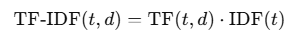

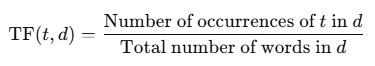

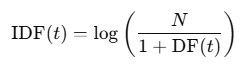

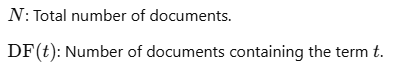

In [ ]:
corpus = ['This is the first document.',
           'this is the second second document.',
           'And the third one.',
           'Is this the first document?',
          ]

vectorizer = sk_text.TfidfVectorizer(min_df=1)
X = vectorizer.fit_transform(corpus)
print (vectorizer.get_feature_names_out())
print(X.toarray())

In [ ]:
print(vectorizer.idf_)

In [ ]:
vectorizer.transform(['The first and    last,document.']).toarray()

Removing stop-words

In [ ]:
vectorizer = sk_text.TfidfVectorizer(stop_words = 'english',min_df=1)
X = vectorizer.fit_transform(corpus)
print (vectorizer.get_feature_names_out())
print(X.toarray())

SciKit datasets: http://scikit-learn.org/stable/datasets/

We will use the 20-newsgroups datasets which consists of postings on 20 different newsgroups.

More information here: http://scikit-learn.org/stable/datasets/#the-20-newsgroups-text-dataset


In [ ]:
from sklearn.datasets import fetch_20newsgroups

categories = ['comp.os.ms-windows.misc', 'sci.space','rec.sport.baseball']
#categories = ['alt.atheism', 'sci.space','rec.sport.baseball']
news_data = sk_data.fetch_20newsgroups(subset='train',
                               remove=('headers', 'footers', 'quotes'),
                               categories=categories)
print (news_data.target)        # 0: Windows , 1: Space , 2: Baseball
print (len(news_data.target))

In [ ]:
print (type(news_data))     # Dictionary-like Object
print("\n")
print (news_data.filenames)
print("\n")
print (news_data.target[:10])
print("\n")
print (news_data.data[1])
print("\n")
print (len(news_data.data))

In [ ]:
vectorizer = sk_text.TfidfVectorizer(stop_words='english',
                             #max_features = 100,
                             min_df=4, max_df=0.8)
data = vectorizer.fit_transform(news_data.data)
print(type(data))
print(vectorizer.get_feature_names_out())
#print(data[0][:10])
print("\n")
print(vectorizer.get_feature_names_out()[:50])   # First 50 words
print("\n")
print(vectorizer.get_feature_names_out()[-50:])  # Last 50 words

In [ ]:
print(vectorizer.idf_)

## Feature normalization

Python provides some functionality for normalizing and standardizing the data. Be careful though, some operations work only with dense data.

http://scikit-learn.org/stable/modules/preprocessing.html#preprocessing

Use the function **<a href = "https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html">preprocessing.scale</a>** to normalize by removing the mean and dividing by the standard deviation. This is done per **feature**, that is, per column of the dataset.

The **scale** command transforms data so that they have zero mean and standard deviation 1

It can be applied to columns (axis=0)

In [ ]:
from sklearn import preprocessing

X = np.array([[ 1., -1.,  2.],
              [ 2.,  0.,  1.],
              [ 0.,  1., -1.]])
print("column means: ",X.mean(axis = 0))   # axis = 0 columns , axis = 1 rows
print("column std: ",X.std(axis = 0))
X_scaled = preprocessing.scale(X)
print("\n")
print("after feature normalization")
print(X_scaled)
print("\n")
print("normalized column means: ",X_scaled.mean(axis=0))
print("normalized column std: ",X_scaled.std(axis = 0))

Or to rows (axis=1)

In [ ]:
print("row means: ",X.mean(axis = 1))
print("row std: ",X.std(axis = 1))
X_scaled = preprocessing.scale(X, axis = 1)
print("\n")
print("after row normalization")
print(X_scaled)
print("\n")
print("normalized row means: ",X_scaled.mean(axis=1))
print("normalized row std: ",X_scaled.std(axis = 1))

Feature normalization will not work with sparse data. In this case, the zeros are treated as values, so the sparse matrix will become non-sparse after normalization.

In [ ]:
import scipy.sparse
cX = scipy.sparse.csc_matrix(X)
cX_scaled = preprocessing.scale(cX)
print(cX_scaled)

You should be careful when working with sparse data. In these cases you may want to normalize only the non-zero values (e.g., subtract the mean of only the non-zero values for the non-zero values). This should be done **manually**.

The same scaling with preprocessing.scale can also be done with the **<a href = "https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html">StandardScaler</a>** from the preprocessing library of sklearn.

The function **fit()** computes the parameters for scaling, and **transform()** applies the scaling

In [ ]:
from sklearn import preprocessing
std_scaler = preprocessing.StandardScaler()
std_scaler.fit(X)
print(X)
print("\n")
print("Column Means:")
print(std_scaler.mean_)
print("\nColumn Std:")
print(std_scaler.scale_)
X_std = std_scaler.transform(X)
print("\n")
print("scaled data:")
print(X_std)

The advantage is the we can now apply the transform to new data.

For example, we compute the parameters for the training data and we apply the scaling to the test data.

In [ ]:
y = np.array([[2.,3.,1.],
              [1.,2.,1.]])
print(std_scaler.transform(y))

The **MinMaxScaler** subbtracts from each column the minimum and then divides by the max-min.

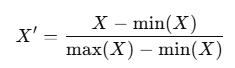

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
X_minmax = min_max_scaler.fit_transform(X)
print("Original Matrix:")
print(X)
print("\n")
print("MinMax Scaled Matrix:")
print(X_minmax)
print("\n")
print(min_max_scaler.transform(y))

In [ ]:
z = np.array([3,-2,0]).reshape(1,3)  # Reshape to make it into 1 feature
min_max_scaler.transform(z)

The **MaxAbsScaler** divides with the maximum absolute value.

The MaxAbsScaler can work with sparse data, since it does not destroy the data sparseness. For the other datasets, removing the mean (or min) can destroy the sparseness of the data.

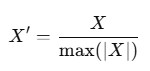

In [ ]:
print("Original Matrix:")
print(X)
max_abs_scaler = preprocessing.MaxAbsScaler()
X_maxabs = max_abs_scaler.fit_transform(X)
print("\n")
print("MaxAbs Scaled Matrix:")
print(X_maxabs)

In [ ]:
# works with sparse data
cX_scaled = max_abs_scaler.transform(cX)
print(cX_scaled)

The **normalize** function normalizes the **rows** so that they become unit vectors in some norm that we specify. It can be applied to sparse matrices without destroying the sparsity.

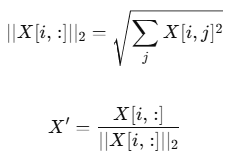

In [ ]:
#works with sparse data

X_normalized = preprocessing.normalize(X, norm='l2')

print("Original Matrix:")
print(X)
print("\n")
print("L2 Normalized Matrix:")
print(X_normalized)

In [ ]:
crX = scipy.sparse.csr_matrix(X)
crX_scaled = preprocessing.normalize(crX,norm='l1')
print(crX_scaled)